### Análise e Classificação de sentimentos do Twitter

Nesse pequeno projeto serão aplicadas ferramentas de análise, processamento de linguagem natural em um conjunto de dados da plataforma Kaggle, que tem por objetivo classificar comentários do twitter de acordo com comentário.

São ao todo cerca de 4 variáveis que descrevem os dados dos comentários. Esses dados foram retirados do twitter atualmente conhecida como "X". É disponibilizado  cerca de dois datasets, um de treino e outro de validação. O dataset de treino além das variáveis features para treinamento do algoritmo, há também a variável target ou alvo (tipo de comentário). Na dataset de teste (que será usado para gerar as previsões) apenas as features.

 **Dados**

 Os dados do dataset podem ser encontrados aqui. São 3 features e 1 variável target são:



1.   **Twitter ID** : Id do comentário
2.   **Entity** : Empresa que recebeu o comentário
3.   **Target** : Tipo de comentário
4.   **content** : Conteúdo do comentário

**Modelagem**

Para esse projeto utilizaremos uma biblioteca NTLK para análise e pré-processamento textual. que realizará importações de algumas funções necessárias para processamento de linguagem natural.

**Objetivo**



A intenção desse Caderno e aplicar Machine Learning e Análise de Dados para Criação de um modelo ML que consiga classificar o comentário e analisar os insights atráves dos dados respectivamente

In [ ]:
import pandas as pd
# load data
cols=['tweetid', 'entity', 'target', 'content']
df_twitter = pd.read_csv('twitter_training.csv', names=cols)
df_twitter.head()

,tweetid,entity,target,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Verificando as colunas do dataframe

In [ ]:
df_twitter.columns

Index(['tweetid', 'entity', 'target', 'content'], dtype='object')

Informação dos dados

In [ ]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweetid  74682 non-null  int64 
 1   entity   74682 non-null  object
 2   target   74682 non-null  object
 3   content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Empresas que foram mencionadas

In [ ]:
df_twitter['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

Verificando as variáveis da coluna alvo

In [ ]:
df_twitter['target'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

Verificando os valores NaN's dos dados
Na coluna *Content* possui 686 dados do tipo NaN'S

In [ ]:
df_twitter.isnull().sum()

tweetid      0
entity       0
target       0
content    686
dtype: int64

Comando para excluir esses dados do tipo NaN's

In [ ]:
df_twitter.dropna(inplace=True)

Após excluir os dados NaN's, percebe-se que nas colunas não existe dados do tipo NaN's

In [ ]:
df_twitter.isnull().sum()

tweetid    0
entity     0
target     0
content    0
dtype: int64

Verificando se existe twitter duplicados
Contém 2340 ids duplicados


In [ ]:
df_twitter.duplicated().sum()

2340

Comando para excluir os ids duplicados

In [ ]:
df_twitter.drop_duplicates(inplace=True)

Após excluir os ids duplicados

In [ ]:
df_twitter.duplicated().sum()

0

## Análise do DataFrame


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Analisando como está a distribuição das variáveis da coluna alvo *target*

Abaixo é possível analisar a quantidade de cada sentimento no dataframe

<ipython-input-13-f7ef27c5c924>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df_twitter, y = 'target', palette ='cubehelix', edgecolor ='Black')


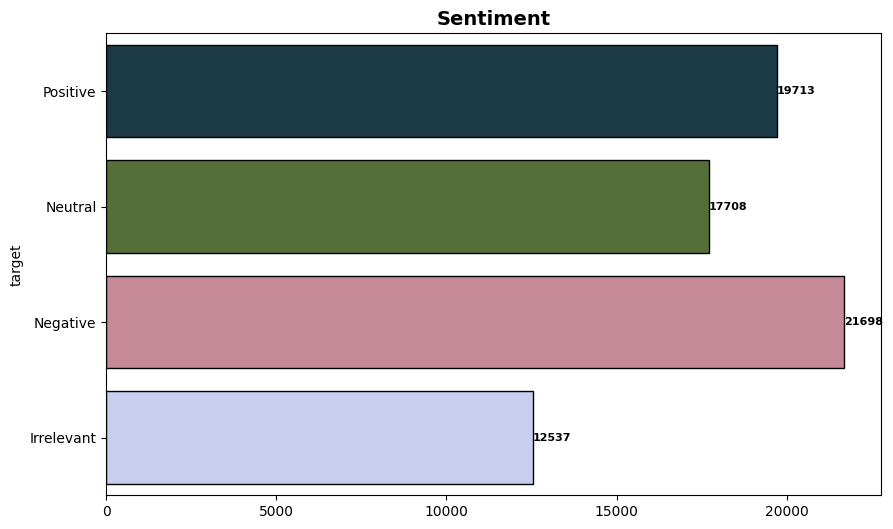

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.countplot(df_twitter, y = 'target', palette ='cubehelix', edgecolor ='Black')
for bars in ax.containers:
    ax.bar_label(bars, fontsize =8, fontweight ='bold')
ax.set_xlabel("")
ax.set_title('Sentiment', fontsize = 14, fontweight = 'bold', color = 'black')
fig.show()
plt.show()

Análise quais empresas receberam mais comenntários no Twitter

In [ ]:
import plotly.express as px
cont_entity = df_twitter['entity'].value_counts().reset_index()
cont_entity.columns =['entity','count']
fig = px.bar(cont_entity, y='entity', x='count', orientation='h',
             height=1000)  # Adjust chart height
fig.show()

Analisando e agrupando quais empresas possui mais comentários "Negative"

In [ ]:
df_entity_target = df_twitter.groupby(['entity', 'target']).size().reset_index(name='count')
df_entity_target_positiv = df_entity_target[df_entity_target['target']=='Positive']
df_entity_target_positiv = df_entity_target_positiv.sort_values(by='count', ascending=True)
# Create graphic of bar with px
fig = px.bar(df_entity_target_positiv, y='entity', x='count', orientation='h', title='Top comentarios positivo',
             color='count')
fig.update_traces(marker=dict(colorscale='Viridis'), selector=dict(type='bar'))
fig.update_layout(height=900)
# Show
fig.show()

Analisando e agrupando quais empresas receberam mais comentários "Positive"

In [ ]:
df_entity_target_negative = df_entity_target[df_entity_target['target']=='Negative']
df_entity_target_negative = df_entity_target_negative.sort_values(by='count', ascending=True)
# Create graphic of bar with px
fig = px.bar(df_entity_target_negative, y='entity', x='count', orientation='h', title='Top comentarios negativos',
             color='count')
fig.update_traces(marker=dict(colorscale='Viridis'), selector=dict(type='bar'))
fig.update_layout(height=900)
# Show
fig.show()

Após essas análise, é possivel concluir que a coluna *Entity* e coluna *Content* possui diretamente uma relação em comum.

Isso porque certas entidades possui predominância de certos tipos de comentários, essa obersavação vai ser crucial ao aplicar os pre-processamento dos dados

### Pré-processamento dos dados

In [ ]:
df_twitter.drop(columns=['tweetid',], axis =1 , inplace = True)
df_twitter.head()

,entity,target,content
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


###Importação da biblioteca NTLK
A NLTK (Natural Language Toolkit) é uma das bibliotecas mais populares para trabalhar com Processamento de Linguagem Natural (PLN) em Python. Ela fornece ferramentas e recursos para tratar texto, realizar análise sintática, análise semântica, mineração de textos.

In [ ]:
#Instalação da biblioteca NTLK
!pip install nltk

Importação de bibliotecas de apoio da NTLK

Criação de uma função para processar a coluna *Content*

In [ ]:
#Importação de bibliotecas necessárias para LNP
import nltk
#Aplicação de Stopwords
from nltk.corpus import stopwords
#Aplicação da token
from nltk.tokenize import word_tokenize
#Aplicação do PorterStremmer
from nltk.stem import PorterStemmer
import string
#Stopwords : irrelevantes para a análise de texto
#pois ocorrem com frequência em todos os tipos de documentos e não contribuem significativamente para o significado do texto.

# Baixar stopwords e punkt do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Inicializar o stemmer
#é o processo de reduzir as palavras à sua raiz ou base, removendo sufixos e prefixos.
stemmer = PorterStemmer()

# Função para pré-processamento de texto
def preprocess_text(text):
    # Tokenização
    tokens = word_tokenize(text.lower())

    # Remoção de stopwords e pontuações
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Reconstruir o texto pré-processado
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Aplicação da função de linguagem natural

In [ ]:
df_twitter['content']= df_twitter['content'].apply(preprocess_text)
df_twitter.head()


,entity,target,content
0,Borderlands,Positive,im get borderland murder
1,Borderlands,Positive,come border kill
2,Borderlands,Positive,im get borderland kill
3,Borderlands,Positive,im come borderland murder
4,Borderlands,Positive,im get borderland 2 murder


Anteriormente , percebemos uma grande influência das entidades com seus conteúdos.Portanto, para o aprendizado dos modelos de Machine Learning, iremos combinar as duas colunas


In [ ]:
df_twitter['text_combined'] = df_twitter['content'] + ' ' + df_twitter['entity']
df_twitter.head()

,entity,target,content,text_combined
0,Borderlands,Positive,im get borderland murder,im get borderland murder Borderlands
1,Borderlands,Positive,come border kill,come border kill Borderlands
2,Borderlands,Positive,im get borderland kill,im get borderland kill Borderlands
3,Borderlands,Positive,im come borderland murder,im come borderland murder Borderlands
4,Borderlands,Positive,im get borderland 2 murder,im get borderland 2 murder Borderlands


Separação do variável indepente

In [ ]:
X= df_twitter['text_combined']
X

0                     im get borderland murder Borderlands
1                             come border kill Borderlands
2                       im get borderland kill Borderlands
3                    im come borderland murder Borderlands
4                   im get borderland 2 murder Borderlands
                               ...                        
74677    realiz window partit mac like 6 year behind nv...
74678    realiz mac window partit 6 year behind nvidia ...
74679    realiz window partit mac 6 year behind nvidia ...
74680    realiz window partit mac like 6 year behind nv...
74681    like window partit mac like 6 year behind driv...
Name: text_combined, Length: 71656, dtype: object

Separação do variável dependente

In [ ]:
Y = df_twitter['target'].values
Y

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

O **TfidfVectorizer**  é uma classe da biblioteca scikit-learn usada para transformar uma coleção de documentos de texto em uma matriz de recursos TF-IDF (Term Frequency-Inverse Document Frequency). Esse método é amplamente utilizado em processamento de linguagem natural e aprendizado de máquina para converter texto em uma forma numérica que pode ser usada por algoritmos de aprendizado de máquina.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Inicializando o vetorizador
vectorizer = TfidfVectorizer()

#Transformando o texto em uma matriz TF-IDF
X = vectorizer.fit_transform(X)

O **LabelEncoder** é uma classe da biblioteca scikit-learn usada para converter rótulos de categorias em valores numéricos. É uma ferramenta útil para transformar dados categóricos em uma forma que pode ser usada por algoritmos de aprendizado de máquina, que geralmente esperam entradas numéricas.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
Y = LB.fit_transform(Y)
Y

array([3, 3, 3, ..., 3, 3, 3])

Acessando e exibindo as classes que foram mapeadas pelo LabelEncoder.

In [ ]:
classes = LB.classes_
for i, classe in enumerate(classes):
    print(f"{i}: {classe}")


0: Irrelevant
1: Negative
2: Neutral
3: Positive


####Treinamento e teste do modelo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Visualizando a distribuição dos dados do *y_train*

<ipython-input-28-a84c63775b79>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




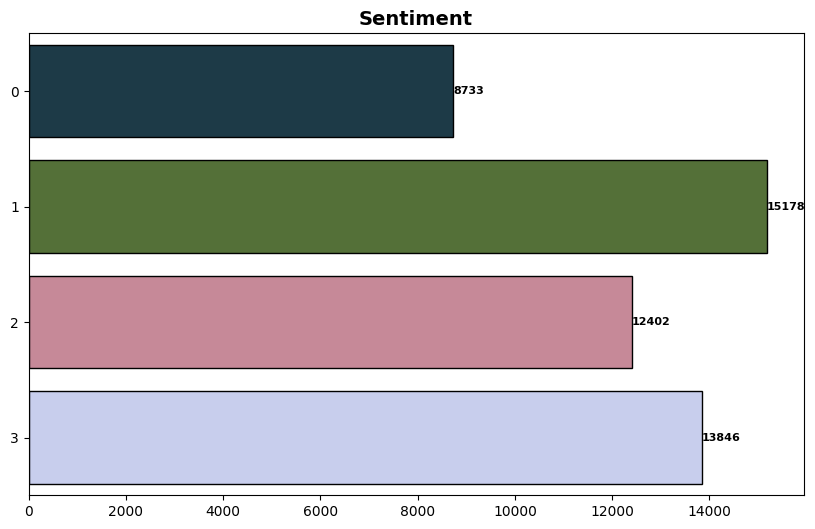

In [ ]:
fig, ax =plt.subplots(figsize=(10, 6))
ax=sns.countplot(y =y_train, palette ='cubehelix', edgecolor ='Black')
for bars in ax.containers:
    ax.bar_label(bars, fontsize =8, fontweight ='bold')
ax.set_xlabel("")
ax.set_title('Sentiment', fontsize = 14, fontweight = 'bold', color = 'black')
fig.show()
plt.show()

Visualizando a distribuição dos dados do *y_test*

<ipython-input-29-b4c43aa60f8a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




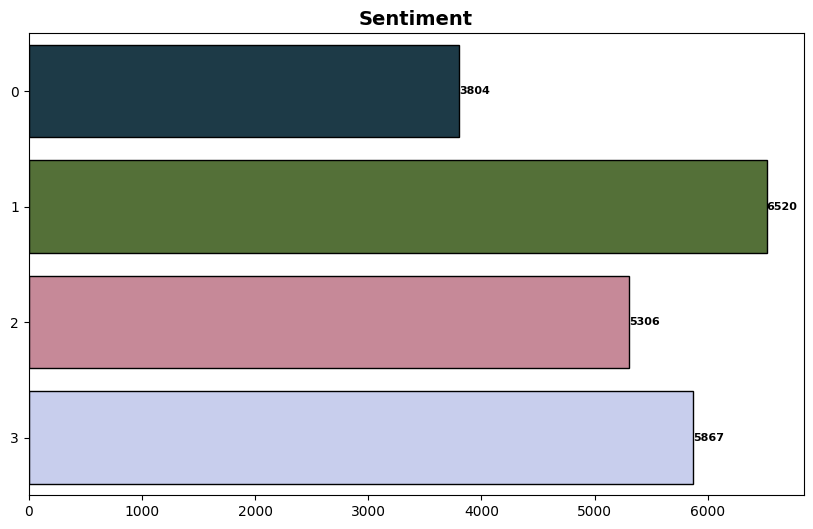

In [ ]:
fig, ax =plt.subplots(figsize=(10, 6))
ax=sns.countplot(y=y_test, palette ='cubehelix', edgecolor ='Black')
for bars in ax.containers:
    ax.bar_label(bars, fontsize =8, fontweight ='bold')
ax.set_xlabel("")
ax.set_title('Sentiment', fontsize = 14, fontweight = 'bold', color = 'black')
fig.show()
plt.show()

Abaixo importamos e configuramos várias bibliotecas e modelos de classificação (DecisionTree, ExtraTree, RandomForest, ExtraTrees, XGBoost, LightGBM e SVC) para realizar a tarefa de classificação em um conjunto de dados. Ele define uma semente para reprodutibilidade, inicializa os modelos com parâmetros específicos, treina-os usando um conjunto de dados de treinamento e avalia seu desempenho utilizando a acurácia balanceada nos conjuntos de treinamento e teste. O progresso do treinamento é monitorado com uma barra de progresso tqdm, e os resultados são impressos para cada modelo, facilitando a comparação de suas performances.








In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import (balanced_accuracy_score,
                             confusion_matrix)
# Others
#==========================================================
from collections import Counter
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')


O código abaixo formata e imprime o nome de cada modelo e suas acurácias balanceadas nos conjuntos de treinamento e teste, facilitando a comparação da performance dos modelos de forma clara e precisa.

É notável que destacam-se dois modelos :     

1)  RandomForestClassifier | Acc Train: 0.9836 | Acc Test: 0.9305

2)  ExtraTreesClassifier | Acc Train: 0.9836 | Acc Test: 0.9358

In [ ]:
SEED = 42
dt = DecisionTreeClassifier(random_state = SEED)
et = ExtraTreeClassifier(random_state = SEED)
rf = RandomForestClassifier(random_state = SEED, n_jobs = -1)
ets = ExtraTreesClassifier(random_state = SEED, bootstrap = True, n_jobs = -1)
xgb = XGBClassifier(random_state = SEED, n_jobs = -1)
lgbm = LGBMClassifier(random_state = SEED, n_jobs = -1, verbosity = -1)
svc = SVC(random_state = SEED)

MODELS = [dt, et, rf, ets, xgb, lgbm,svc]

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"* {name} | Acc Train: {balanced_accuracy_score(y_train, y_pred_train):.4f} | Acc Test: {balanced_accuracy_score(y_test, y_pred_test):.4f}")


  0%|          | 0/7 [00:00<?, ?it/s]

* DecisionTreeClassifier | Acc Train: 0.9837 | Acc Test: 0.8100
* ExtraTreeClassifier | Acc Train: 0.9837 | Acc Test: 0.7843
* RandomForestClassifier | Acc Train: 0.9836 | Acc Test: 0.9305
* ExtraTreesClassifier | Acc Train: 0.9836 | Acc Test: 0.9358
* XGBClassifier | Acc Train: 0.7387 | Acc Test: 0.6647
* LGBMClassifier | Acc Train: 0.7230 | Acc Test: 0.6591
* SVC | Acc Train: 0.9730 | Acc Test: 0.9185


###Implementação do modelo RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state = SEED, n_jobs = -1)

Treinamento do Modelo Ramdom

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Previsão e verificando a accuracy do modelo

In [ ]:
y_test_rf = rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_rf)
test_accuracy_rf

0.9342233800065125

Métricas do modelo

É importante explicar que essas métricas são fundamentais para entender o desempenho do modelo

O trecho de código apresentado exibe métricas de avaliação para um modelo de classificação, detalhando a performance em termos de precisão, recall e F1-Score para cada classe. A precisão indica a proporção de predições corretas entre todas as predições positivas feitas pelo modelo. O recall mede a capacidade do modelo de identificar corretamente todas as amostras positivas reais. O F1-Score é a média harmônica entre precisão e revocação, proporcionando uma métrica única que balanceia ambas.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_rf))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3804
           1       0.93      0.95      0.94      6520
           2       0.94      0.93      0.94      5306
           3       0.91      0.94      0.93      5867

    accuracy                           0.93     21497
   macro avg       0.94      0.93      0.93     21497
weighted avg       0.93      0.93      0.93     21497



Matriz de Confusão do Ramdom

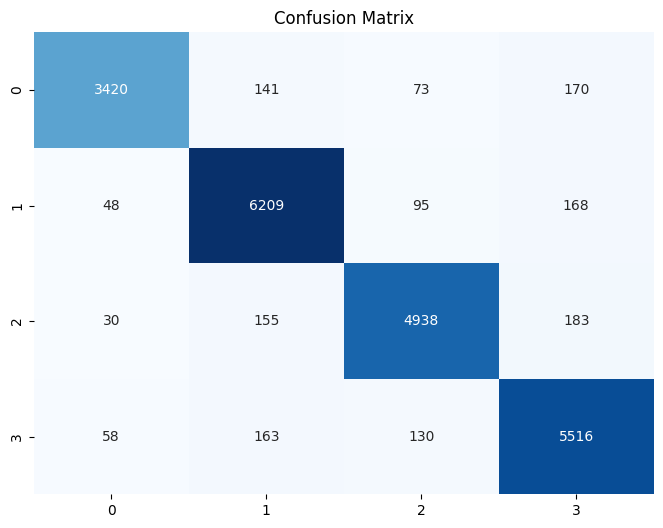

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_rf)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.show()

### Implementação do modelo ExtraTreesClassifier

In [ ]:
ets = ExtraTreesClassifier(random_state = SEED, bootstrap = True, n_jobs = -1)

Treinamento do modelo Extra

In [ ]:
ets.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, n_jobs=-1, random_state=42)

Previsão e verificando a accuracy do modelo

In [ ]:
y_test_ets = ets.predict(X_test)
test_accuracy_ets = accuracy_score(y_test, y_test_ets)
test_accuracy_ets

0.9397590361445783

Métricas do modelo

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_ets))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3804
           1       0.94      0.96      0.95      6520
           2       0.95      0.94      0.94      5306
           3       0.92      0.95      0.93      5867

    accuracy                           0.94     21497
   macro avg       0.94      0.94      0.94     21497
weighted avg       0.94      0.94      0.94     21497



Matriz de Confusão do Extra

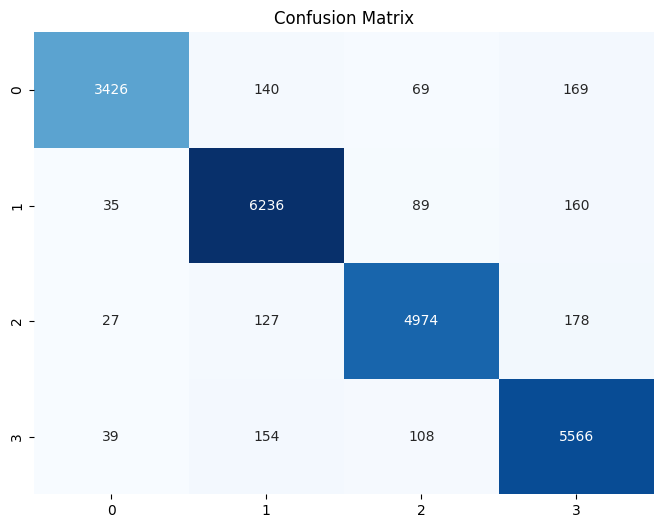

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_ets)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.show()

###Resultados dos Modelos

In [ ]:
import pandas as pd
metrics ={
    'Model':['Random Forest', 'ExtraTreesClassifier'],
    'Accuracy': [test_accuracy_rf,test_accuracy_ets],
    'Precision 0': [precision_score(y_test, y_test_rf, pos_label=0, average='weighted'),precision_score(y_test, y_test_ets, pos_label=0, average='weighted')],
    'Precision 1': [precision_score(y_test, y_test_rf, pos_label=1, average='weighted'),precision_score(y_test, y_test_ets, pos_label=1, average='weighted')],
    'Precsion 2': [precision_score(y_test, y_test_rf, pos_label=2, average='weighted'),precision_score(y_test, y_test_ets, pos_label=2, average='weighted')],
    'Precsion 3': [precision_score(y_test, y_test_rf, pos_label=3, average='weighted'),precision_score(y_test, y_test_ets, pos_label=3, average='weighted')],
    'Recall 0': [recall_score(y_test, y_test_rf, pos_label=0, average='weighted'),recall_score(y_test, y_test_ets, pos_label=0, average='weighted')],
    'Recall 1': [recall_score(y_test, y_test_rf, pos_label=1, average='weighted'),recall_score(y_test, y_test_ets, pos_label=1, average='weighted')],
    'Recall 2': [recall_score(y_test, y_test_rf, pos_label=2, average='weighted'),recall_score(y_test, y_test_ets, pos_label=2, average='weighted')],
    'Recall 3': [recall_score(y_test, y_test_rf, pos_label=3, average='weighted'),recall_score(y_test, y_test_ets, pos_label=3, average='weighted')],
}
metrics = pd.DataFrame(metrics)

Abaixo possui as métricas dos modelos treinado, percebe-se que os dois modelos possuem semelhanças nos resultados

In [ ]:
metrics.head()

,Model,Accuracy,Precision 0,Precision 1,Precsion 2,Precsion 3,Recall 0,Recall 1,Recall 2,Recall 3
0,Random Forest,0.934223,0.934753,0.934753,0.934753,0.934753,0.934223,0.934223,0.934223,0.934223
1,ExtraTreesClassifier,0.939759,0.940437,0.940437,0.940437,0.940437,0.939759,0.939759,0.939759,0.939759


### Validação dos Modelos

In [ ]:
df_validation = pd.read_csv('twitter_validation.csv',names=cols)
df_validation

,tweetid,entity,target,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df_validation['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [ ]:
df_validation.drop(columns=['tweetid'], axis =1 , inplace = True)
df_validation.head()

,entity,target,content
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df_validation['content']= df_validation['content'].apply( preprocess_text)
df_validation.head()

,entity,target,content
0,Facebook,Irrelevant,mention facebook struggl motiv go run day tran...
1,Amazon,Neutral,bbc news amazon boss jeff bezo reject claim co...
2,Microsoft,Negative,microsoft pay word function poorli samsungu ch...
3,CS-GO,Negative,csgo matchmak full closet hack 's truli aw game
4,Google,Neutral,presid slap american face realli commit unlaw ...


In [ ]:
df_validation['text_combined'] = df_validation['content'] + ' ' + df_validation['entity']
df_validation.head()

,entity,target,content,text_combined
0,Facebook,Irrelevant,mention facebook struggl motiv go run day tran...,mention facebook struggl motiv go run day tran...
1,Amazon,Neutral,bbc news amazon boss jeff bezo reject claim co...,bbc news amazon boss jeff bezo reject claim co...
2,Microsoft,Negative,microsoft pay word function poorli samsungu ch...,microsoft pay word function poorli samsungu ch...
3,CS-GO,Negative,csgo matchmak full closet hack 's truli aw game,csgo matchmak full closet hack 's truli aw gam...
4,Google,Neutral,presid slap american face realli commit unlaw ...,presid slap american face realli commit unlaw ...


In [ ]:
X_validation = vectorizer.transform(df_validation['text_combined'])

In [ ]:
Y_validation = df_validation['target'].values

In [ ]:
Y_validation = LB.fit_transform(Y_validation)
Y_validation

array([0, 2, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2,
       0, 1, 2, 2, 1, 0, 0, 1, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2,
       3, 2, 1, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 0, 1, 2,
       1, 0, 2, 1, 3, 1, 1, 3, 3, 0, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2, 1, 0,
       1, 2, 2, 1, 3, 0, 0, 1, 1, 1, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 2, 1, 1, 3, 1, 2, 1, 3, 2, 1, 2, 0, 3,
       2, 3, 3, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 3, 1, 2, 2,
       2, 0, 2, 1, 2, 3, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 3, 3, 3, 2, 2, 3,
       0, 2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 0, 0, 2, 3, 3, 2, 0, 2, 1, 1, 1,
       1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 0, 2, 0, 1, 1, 0, 0, 1, 3, 3, 1,
       0, 1, 3, 3, 1, 0, 0, 3, 3, 1, 3, 0, 2, 0, 0, 1, 2, 2, 3, 1, 0, 0,
       3, 3, 0, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 1, 2, 3, 2, 1, 2, 2,
       1, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3,
       2, 2, 1, 3, 1, 3, 1, 0, 2, 2, 3, 1, 2, 1, 0,

###Validando o modelo  RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_pred_validation = rf.predict(X_validation)
test_accuracy = accuracy_score(Y_validation, y_test_pred_validation)
test_accuracy

0.957

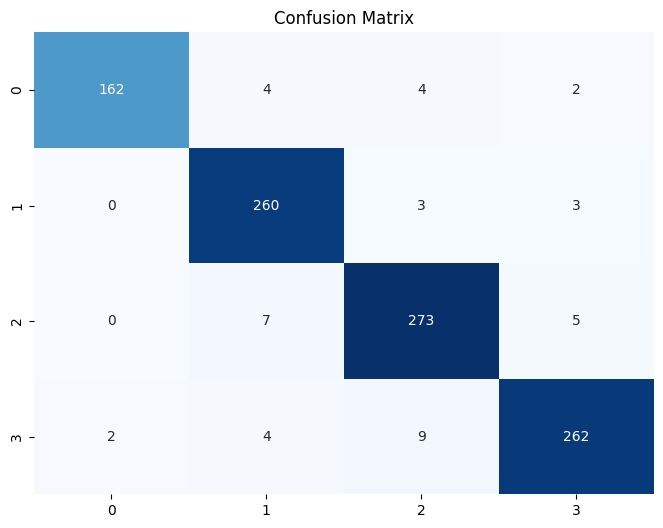

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(Y_validation, y_test_pred_validation)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_validation, y_test_pred_validation))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       172
           1       0.95      0.98      0.96       266
           2       0.94      0.96      0.95       285
           3       0.96      0.95      0.95       277

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



###Validando o modelo ExtraTreesClassifier

In [ ]:
y_test_pred_validation_ets = ets.predict(X_validation)
test_accuracy = accuracy_score(Y_validation, y_test_pred_validation_ets)
test_accuracy

0.962

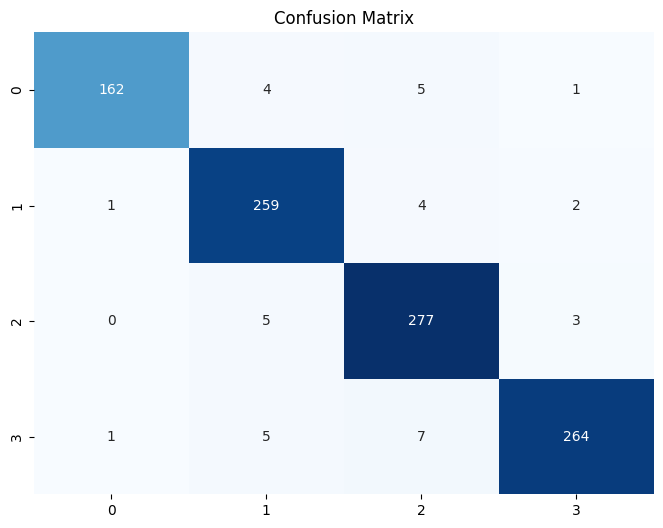

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(Y_validation, y_test_pred_validation_ets)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_validation, y_test_pred_validation_ets))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       172
           1       0.95      0.97      0.96       266
           2       0.95      0.97      0.96       285
           3       0.98      0.95      0.97       277

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



#Conclusão
Percebe-se que esse dataframa possui 4 quatro classes sendo elas : *Neutro*, *Irrelavnte*, *Positivo*, *Negativo*.Determinados modelos conseguiram prever essas quatro classses com excelente resultados, mas para fins de negócio o ideal seria reduzir essas quatros classes para duas classes, o motivo disso é analisar a classe *Neutro* alguns podem ter o pensamento que comentários neutros são comentários positivos já que esses comentários não necesseriamente está falando algo negativo da empresa,a mesma ideia pode proseguir nos comentários *Irrelavantes*, essa análise de classes é crucial para determinar o objetivo do modelo e de negócios.
   
Esse projeto consta aplicar aprendizagem de máquina em projeto que possuem processamento de linguagem natural, esse dataframe foi retirado da plataforma Kaggle [Análise de sentimento do Twitter](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/code)